In [1]:
import os
import glob
import pandas as pd
import seaborn as sns

In [2]:
# read error results
df = pd.read_csv('../best_dev_set_error_type_results.csv')

In [3]:
df.head()

,model,prompt_type,prompt_index,split,Category,TP,FP,FN,P,R,F0.5,model_prompt_type_prompt_index_split
0,google/flan-t5-xxl,1-shot,2,fce-dev,M:ADJ,0,0,10,1.0000,0.0000,0.0000,google/flan-t5-xxl_1-shot_2_fce-dev
1,google/flan-t5-xxl,1-shot,2,fce-dev,M:ADV,1,0,26,1.0000,0.0370,0.1613,google/flan-t5-xxl_1-shot_2_fce-dev
2,google/flan-t5-xxl,1-shot,2,fce-dev,M:CONJ,0,1,16,0.0000,0.0000,0.0000,google/flan-t5-xxl_1-shot_2_fce-dev
3,google/flan-t5-xxl,1-shot,2,fce-dev,M:CONTR,0,3,1,0.0000,0.0000,0.0000,google/flan-t5-xxl_1-shot_2_fce-dev
4,google/flan-t5-xxl,1-shot,2,fce-dev,M:DET,40,8,174,0.8333,0.1869,0.4926,google/flan-t5-xxl_1-shot_2_fce-dev


In [4]:
df.split.unique()

array(['fce-dev', 'jfleg-dev', 'wibea-dev'], dtype=object)

In [5]:
# add support column
df['support'] = df['TP'] + df['FN']

In [6]:
len(df.model_prompt_type_prompt_index_split.unique())

30

In [7]:
df.model.unique()

array(['google/flan-t5-xxl', 'gpt-3.5-turbo-0613',
       'bigscience/bloomz-7b1', 'facebook/opt-iml-max-30b',
       'Writer/InstructPalmyra-20b', 'tiiuae/falcon-40b-instruct',
       'stabilityai/StableBeluga2', 'command',
       'meta-llama/Llama-2-70b-chat-hf', 'gpt-4-0613'], dtype=object)

In [8]:
# filter to split == fce-dev
# dftest = df[df['split'] == 'jfleg-dev']
dftest = df.copy()
# select columns: 'Category', 'TP', 'FP', 'FN', 'support'
dftest = dftest[['Category', 'support', 'split']]
# deduplicate
dftest = dftest.drop_duplicates()
# dftest.split.value_counts()
dftest.Category.value_counts()

Category
R:OTHER         12
M:DET           12
R:VERB:TENSE    12
M:PUNCT         12
R:DET           12
R:PUNCT         11
R:ORTH          11
U:PUNCT         11
R:WO            11
R:NOUN          11
U:DET           11
R:VERB:SVA      10
M:ADV           10
R:NOUN:NUM      10
U:ADJ           10
U:ADV           10
R:ADV           10
M:PREP          10
U:PRON          10
M:OTHER         10
U:NOUN          10
M:NOUN           9
R:PART           9
R:VERB           9
R:SPELL          9
M:CONJ           9
R:PRON           9
R:PREP           9
R:VERB:FORM      9
M:PRON           9
R:MORPH          9
U:PREP           9
U:OTHER          9
U:VERB           8
U:CONJ           8
U:VERB:TENSE     8
M:VERB:FORM      8
M:VERB:TENSE     8
M:ADJ            7
M:VERB           7
R:ADJ            7
U:VERB:FORM      6
M:NOUN:POSS      6
R:NOUN:POSS      5
M:CONTR          5
U:NOUN:POSS      5
R:ADJ:FORM       5
R:CONJ           5
R:CONTR          5
R:NOUN:INFL      5
U:CONTR          4
U:PART           4
M:P

In [9]:
# filter to select R:OTHER category
dftest[dftest['Category'] == 'R:OTHER']

,Category,support,split
27,R:OTHER,394,fce-dev
79,R:OTHER,237,jfleg-dev
132,R:OTHER,748,wibea-dev
563,R:OTHER,303,jfleg-dev
617,R:OTHER,328,jfleg-dev
725,R:OTHER,330,jfleg-dev
994,R:OTHER,309,jfleg-dev
1101,R:OTHER,304,jfleg-dev
1208,R:OTHER,277,jfleg-dev
1476,R:OTHER,230,jfleg-dev


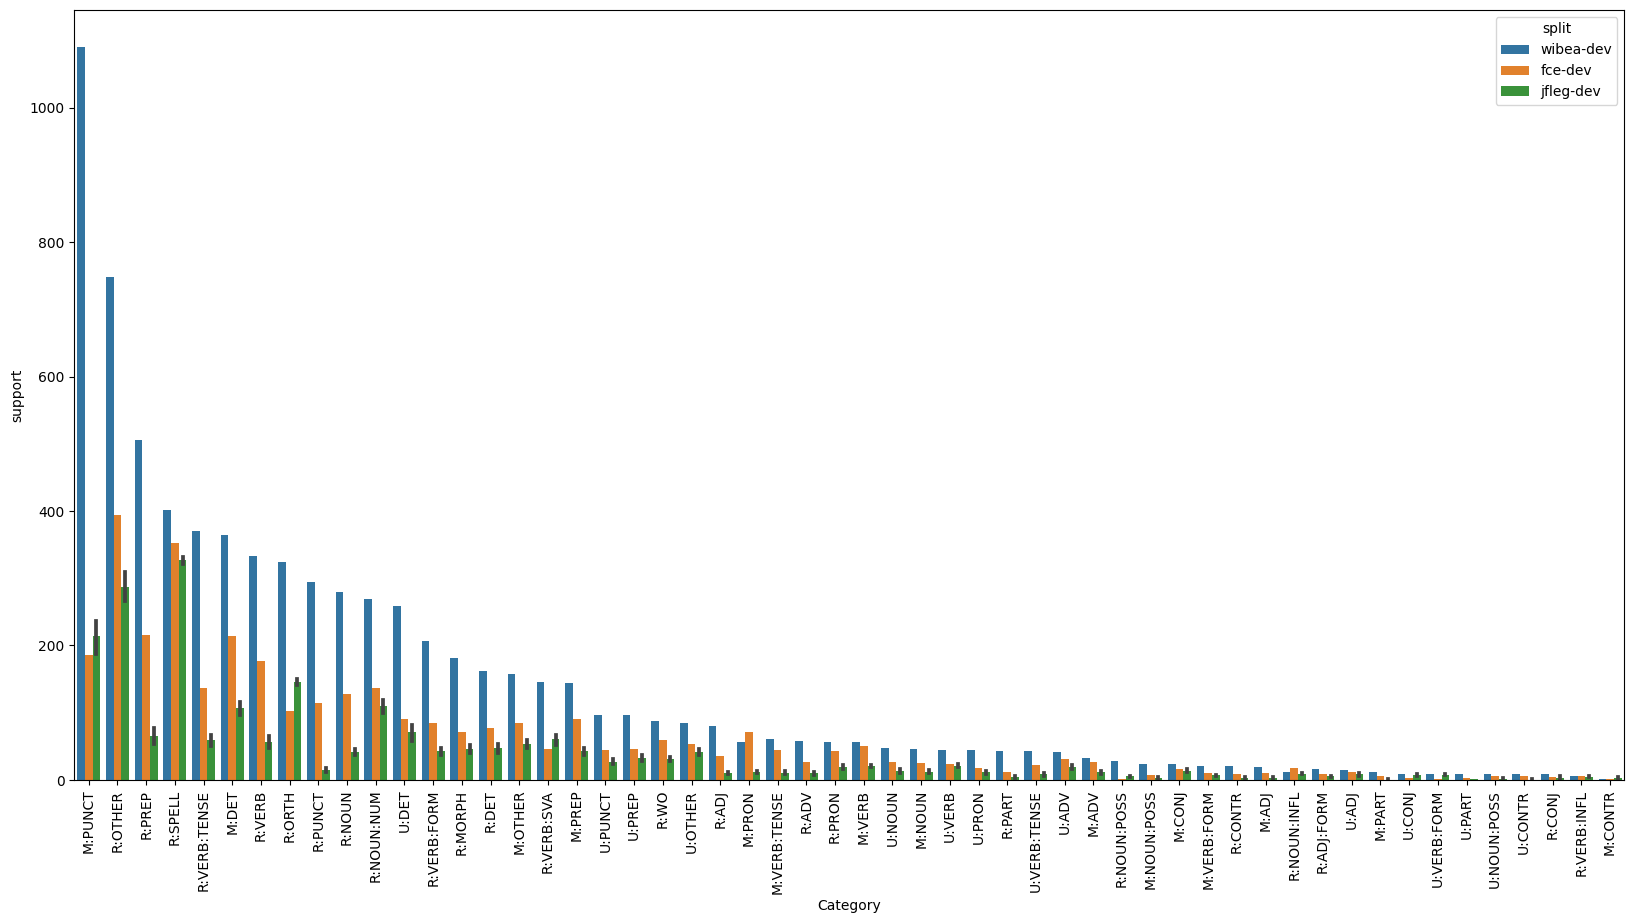

In [10]:
# plot bar chart
import matplotlib.pyplot as plt
import numpy as np

# sort dftest by support
dftest = dftest.sort_values(by=['support'], ascending=False)

# plot bar chart
plt.figure(figsize=(20,10))

# rotate x-axis labels
plt.xticks(rotation=90)

# plot bar chart
ax = sns.barplot(x="Category", y="support", data=dftest, hue='split')

In [11]:
# filter df to split == wibea-dev
dfwibea = df[df['split'] == 'wibea-dev']
dfwibea.model.unique()

array(['gpt-3.5-turbo-0613', 'bigscience/bloomz-7b1',
       'google/flan-t5-xxl', 'facebook/opt-iml-max-30b',
       'Writer/InstructPalmyra-20b', 'tiiuae/falcon-40b-instruct',
       'command', 'meta-llama/Llama-2-70b-chat-hf', 'gpt-4-0613',
       'stabilityai/StableBeluga2'], dtype=object)

In [12]:
dfwibea.head()

,model,prompt_type,prompt_index,split,Category,TP,FP,FN,P,R,F0.5,model_prompt_type_prompt_index_split,support
105,gpt-3.5-turbo-0613,1-shot,2,wibea-dev,M:ADJ,4,12,15,0.2500,0.2105,0.2410,gpt-3.5-turbo-0613_1-shot_2_wibea-dev,19
106,gpt-3.5-turbo-0613,1-shot,2,wibea-dev,M:ADV,12,35,20,0.2553,0.3750,0.2727,gpt-3.5-turbo-0613_1-shot_2_wibea-dev,32
107,gpt-3.5-turbo-0613,1-shot,2,wibea-dev,M:CONJ,2,28,21,0.0667,0.0870,0.0699,gpt-3.5-turbo-0613_1-shot_2_wibea-dev,23
108,gpt-3.5-turbo-0613,1-shot,2,wibea-dev,M:CONTR,1,3,1,0.2500,0.5000,0.2778,gpt-3.5-turbo-0613_1-shot_2_wibea-dev,2
109,gpt-3.5-turbo-0613,1-shot,2,wibea-dev,M:DET,249,162,115,0.6058,0.6841,0.6200,gpt-3.5-turbo-0613_1-shot_2_wibea-dev,364


In [13]:
dfwibea_errors = dfwibea[['Category', 'support']]
# deduplicate
dfwibea_errors = dfwibea_errors.drop_duplicates()
# add column for support as percentage of total
dfwibea_errors['support_percentage'] = dfwibea_errors['support'] / dfwibea_errors['support'].sum() * 100
dfwibea_errors = dfwibea_errors.sort_values(by=['support'], ascending=False)
dfwibea_errors = dfwibea_errors.reset_index(drop=True)
dfwibea_errors

,Category,support,support_percentage
0,M:PUNCT,1091,14.440768
1,R:OTHER,748,9.900728
2,R:PREP,505,6.684315
3,R:SPELL,402,5.320979
4,R:VERB:TENSE,370,4.897419
5,M:DET,364,4.818001
6,R:VERB,333,4.407677
7,R:ORTH,324,4.288551
8,R:PUNCT,294,3.891463
9,R:NOUN,279,3.692919


In [14]:
# select top 18
dfwibea_errors_top_k = dfwibea_errors.iloc[:18]
dfwibea_errors_top_k.describe()

,support,support_percentage
count,18.000000,18.000000
mean,346.333333,4.584161
std,238.166032,3.152429
min,144.000000,1.906023
25%,187.250000,2.478491
50%,286.500000,3.792191
75%,368.500000,4.877565
max,1091.000000,14.440768


In [15]:
def plot_perf_per_error_top_k(df, models: list, top_k: int):
    # filter df to models
    df = df[df['model'].isin(models)]

    # rename models
    df['model'] = df['model'].replace({'gpt-3.5-turbo-0613': 'GPT-3.5-turbo', 'stabilityai/StableBeluga2': 'StableBeluga2', 'tiiuae/falcon-40b-instruct': 'Falcon-40B-instruct'})

    dfcat = df[['Category', 'support']]
    # select the top K most frequent categories by support
    topkcat = dfcat.groupby('Category').sum().sort_values(by=['support'], ascending=False).head(top_k).index.values
    
    # filter df to top 10 categories
    df = df[df['Category'].isin(topkcat)]

    # select rows: model, Category, F0.5
    # df = df[['model', 'Category', 'F0.5']]

    # sort by F0.5
    df = df.sort_values(by=['Category'], ascending=True)

    # plot bar chart
    f = plt.figure(figsize=(15,5))
    # plot it
    # f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 1]}, figsize=(15,5))

    sns.set_theme(style="whitegrid")


    # plot bar chart of f0.5
    # p = sns.barplot(x="Category", y="F0.5", data=df, hue='model')

    # scatter plot with horizontal position jitter
    p = sns.stripplot(x="Category", y="F0.5", data=df, hue='model', jitter=0.2, dodge=True, s=6)

    # p = sns.stripplot(x="model", y="F0.5", data=df, hue='Category', jitter=0.2, dodge=True, s=8)

    # rotate x-axis labels
    plt.xticks(rotation=90)
    # a0.set_xticklabels(a0.get_xticklabels(), rotation=90)

    # set y-axis label
    plt.ylabel('F$_{0.5}$')

    # set y-limit
    plt.ylim(0, 0.8)

    # set x-axis label
    plt.xlabel('Error type')

    # rotate x-axis labels
    plt.xticks(rotation=45, ha='right')

    # remove y-axis grid
    plt.grid(False, axis='y')
    # add x-axis grid
    # plt.grid(True, axis='x')

    # increase font size
    plt.rcParams.update({'font.size': 14})

    # move legend to outside and above plot, horizontal
    plt.legend(bbox_to_anchor=(0.5, 1.12), borderaxespad=0, loc='upper center', ncol=3)

    f.tight_layout()

    # print(df.shape)

    # return plot
    return f

In [16]:
def latex_table(df,models, top_k ):
    # filter df to models
    df = df[df['model'].isin(models)]

    # rename models
    df['model'] = df['model'].replace({'gpt-3.5-turbo-0613': 'GPT-3.5-turbo', 'stabilityai/StableBeluga2': 'StableBeluga2', 'tiiuae/falcon-40b-instruct': 'Falcon-40B-instruct'})

    dfcat = df[['Category', 'support']]
    # select the top K most frequent categories by support
    topkcat = dfcat.groupby('Category').sum().sort_values(by=['support'], ascending=False).head(top_k).index.values
    
    # filter df to top 10 categories
    df = df[df['Category'].isin(topkcat)]

    # select rows: model, Category, F0.5
    # df = df[['model', 'Category', 'F0.5']]

    # sort by F0.5
    df = df.sort_values(by=['Category'], ascending=True)

    # print latex table
    df = df[['model', 'Category', 'F0.5']]
    # df = df.T
    # print(df.to_latex(index=False))
    return df

    

In [17]:
dft = latex_table(dfwibea, ['gpt-3.5-turbo-0613', 'stabilityai/StableBeluga2', 'tiiuae/falcon-40b-instruct'], top_k=18)
# pivot table
dft = dft.pivot(index='Category', columns='model', values='F0.5')
dft.reset_index(inplace=True)
dft.head()

/tmp/ipykernel_1687385/3786758336.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'] = df['model'].replace({'gpt-3.5-turbo-0613': 'GPT-3.5-turbo', 'stabilityai/StableBeluga2': 'StableBeluga2', 'tiiuae/falcon-40b-instruct': 'Falcon-40B-instruct'})


model,Category,Falcon-40B-instruct,GPT-3.5-turbo,StableBeluga2
0,M:DET,0.6428,0.6200,0.6376
1,M:OTHER,0.1550,0.1753,0.2212
2,M:PREP,0.4474,0.4025,0.4223
3,M:PUNCT,0.5703,0.4751,0.4698
4,R:DET,0.3753,0.3535,0.3624


In [18]:
# print latex table with 3 decimal places
print(dft.to_latex(index=False, float_format="%.3f"))

\begin{tabular}{lrrr}
\toprule
Category & Falcon-40B-instruct & GPT-3.5-turbo & StableBeluga2 \\
\midrule
M:DET & 0.643 & 0.620 & 0.638 \\
M:OTHER & 0.155 & 0.175 & 0.221 \\
M:PREP & 0.447 & 0.403 & 0.422 \\
M:PUNCT & 0.570 & 0.475 & 0.470 \\
R:DET & 0.375 & 0.353 & 0.362 \\
R:MORPH & 0.444 & 0.395 & 0.399 \\
R:NOUN & 0.291 & 0.261 & 0.284 \\
R:NOUN:NUM & 0.633 & 0.570 & 0.593 \\
R:ORTH & 0.597 & 0.609 & 0.589 \\
R:OTHER & 0.281 & 0.300 & 0.296 \\
R:PREP & 0.490 & 0.488 & 0.466 \\
R:PUNCT & 0.365 & 0.503 & 0.315 \\
R:SPELL & 0.781 & 0.769 & 0.761 \\
R:VERB & 0.219 & 0.253 & 0.258 \\
R:VERB:FORM & 0.552 & 0.486 & 0.454 \\
R:VERB:SVA & 0.641 & 0.571 & 0.611 \\
R:VERB:TENSE & 0.499 & 0.471 & 0.516 \\
U:DET & 0.530 & 0.555 & 0.554 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1687385/1478849858.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'] = df['model'].replace({'gpt-3.5-turbo-0613': 'GPT-3.5-turbo', 'stabilityai/StableBeluga2': 'StableBeluga2', 'tiiuae/falcon-40b-instruct': 'Falcon-40B-instruct'})


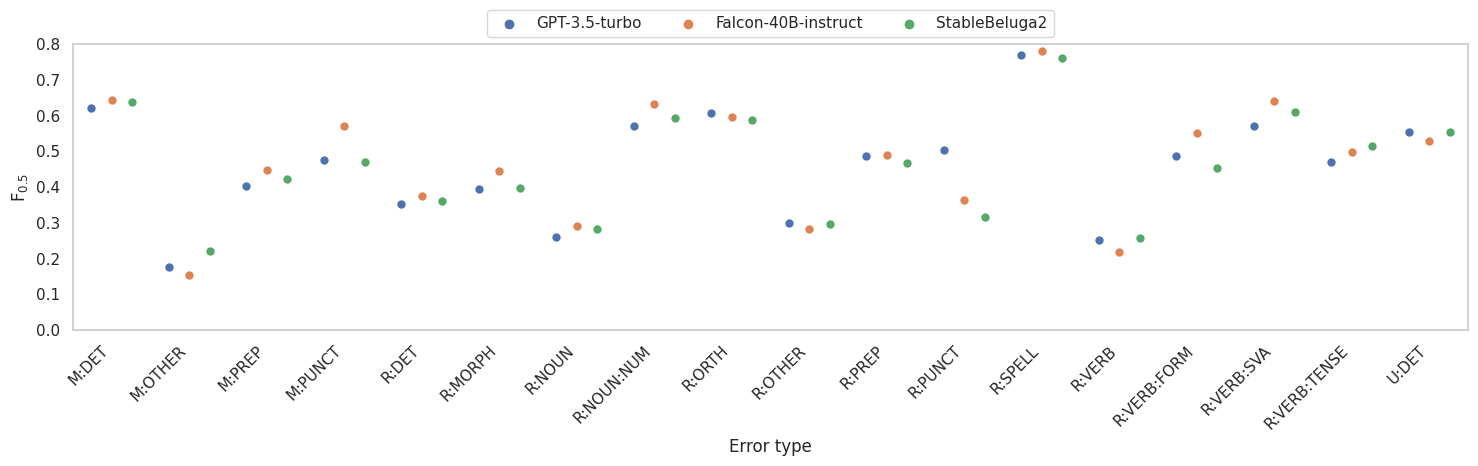

In [19]:
f = plot_perf_per_error_top_k(dfwibea, ['gpt-3.5-turbo-0613', 'stabilityai/StableBeluga2', 'tiiuae/falcon-40b-instruct'], top_k=18)
# save plot in high quality
# f.savefig('wibea-dev-error-type-results-top-18.png', dpi=300)

In [20]:
# for 'gpt-3.5-turbo-0613', find the top 10 best performing categories
dfgpt3 = dfwibea[dfwibea['model'] == 'gpt-3.5-turbo-0613']

dfgpt3 = dfgpt3[['Category', 'F0.5', 'support']]

dfgpt3 = dfgpt3.sort_values(by=['F0.5'], ascending=False)

dfgpt3.head(10)


,Category,F0.5,support
150,U:NOUN:POSS,0.9722,8
128,R:NOUN:INFL,0.9091,11
137,R:SPELL,0.7692,402
140,R:VERB:INFL,0.7353,6
111,M:NOUN:POSS,0.7292,24
121,R:ADJ:FORM,0.6771,16
147,U:CONTR,0.6250,8
109,M:DET,0.6200,364
131,R:ORTH,0.6088,324
130,R:NOUN:POSS,0.5833,28


In [22]:
dfwibea.model.unique()

array(['gpt-3.5-turbo-0613', 'bigscience/bloomz-7b1',
       'google/flan-t5-xxl', 'facebook/opt-iml-max-30b',
       'Writer/InstructPalmyra-20b', 'tiiuae/falcon-40b-instruct',
       'command', 'meta-llama/Llama-2-70b-chat-hf', 'gpt-4-0613',
       'stabilityai/StableBeluga2'], dtype=object)

In [24]:
dfwibea[dfwibea['model'] == 'facebook/opt-iml-max-30b'].sort_values(by=['F0.5'], ascending=False)

,model,prompt_type,prompt_index,split,Category,TP,FP,FN,P,R,F0.5,model_prompt_type_prompt_index_split,support
344,facebook/opt-iml-max-30b,3-shot,3,wibea-dev,R:NOUN:INFL,8,0,3,1.0000,0.7273,0.9302,facebook/opt-iml-max-30b_3-shot_3_wibea-dev,11
356,facebook/opt-iml-max-30b,3-shot,3,wibea-dev,R:VERB:INFL,4,0,2,1.0000,0.6667,0.9091,facebook/opt-iml-max-30b_3-shot_3_wibea-dev,6
353,facebook/opt-iml-max-30b,3-shot,3,wibea-dev,R:SPELL,247,85,155,0.7440,0.6144,0.7139,facebook/opt-iml-max-30b_3-shot_3_wibea-dev,402
337,facebook/opt-iml-max-30b,3-shot,3,wibea-dev,R:ADJ:FORM,5,0,11,1.0000,0.3125,0.6944,facebook/opt-iml-max-30b_3-shot_3_wibea-dev,16
346,facebook/opt-iml-max-30b,3-shot,3,wibea-dev,R:NOUN:POSS,12,4,16,0.7500,0.4286,0.6522,facebook/opt-iml-max-30b_3-shot_3_wibea-dev,28
357,facebook/opt-iml-max-30b,3-shot,3,wibea-dev,R:VERB:SVA,46,13,100,0.7797,0.3151,0.6021,facebook/opt-iml-max-30b_3-shot_3_wibea-dev,146
370,facebook/opt-iml-max-30b,3-shot,3,wibea-dev,U:PRON,12,2,32,0.8571,0.2727,0.6000,facebook/opt-iml-max-30b_3-shot_3_wibea-dev,44
345,facebook/opt-iml-max-30b,3-shot,3,wibea-dev,R:NOUN:NUM,72,23,197,0.7579,0.2677,0.5547,facebook/opt-iml-max-30b_3-shot_3_wibea-dev,269
347,facebook/opt-iml-max-30b,3-shot,3,wibea-dev,R:ORTH,108,59,216,0.6467,0.3333,0.5444,facebook/opt-iml-max-30b_3-shot_3_wibea-dev,324
327,facebook/opt-iml-max-30b,3-shot,3,wibea-dev,M:NOUN:POSS,5,1,19,0.8333,0.2083,0.5208,facebook/opt-iml-max-30b_3-shot_3_wibea-dev,24
